Shape: (7728394, 46)
Columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2

C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')
C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:43: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vedant\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


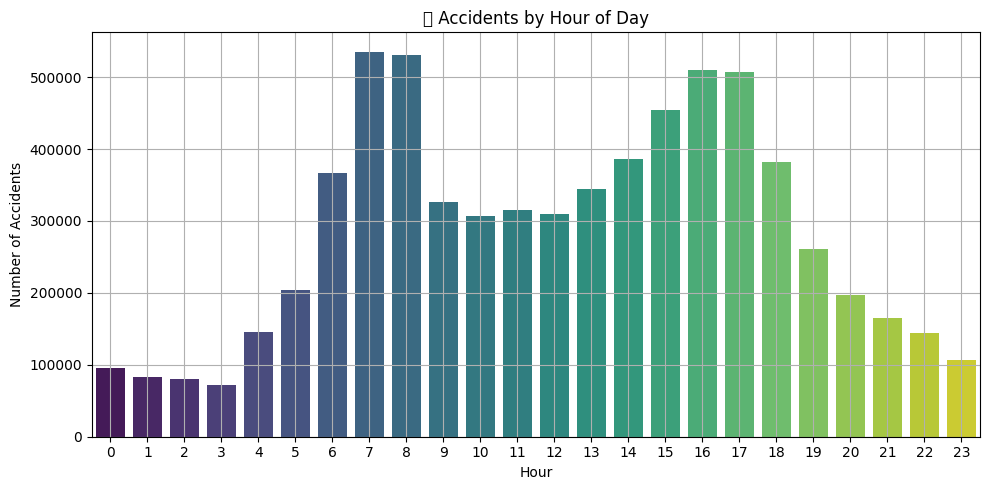

C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=order, palette='crest')
C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:54: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vedant\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


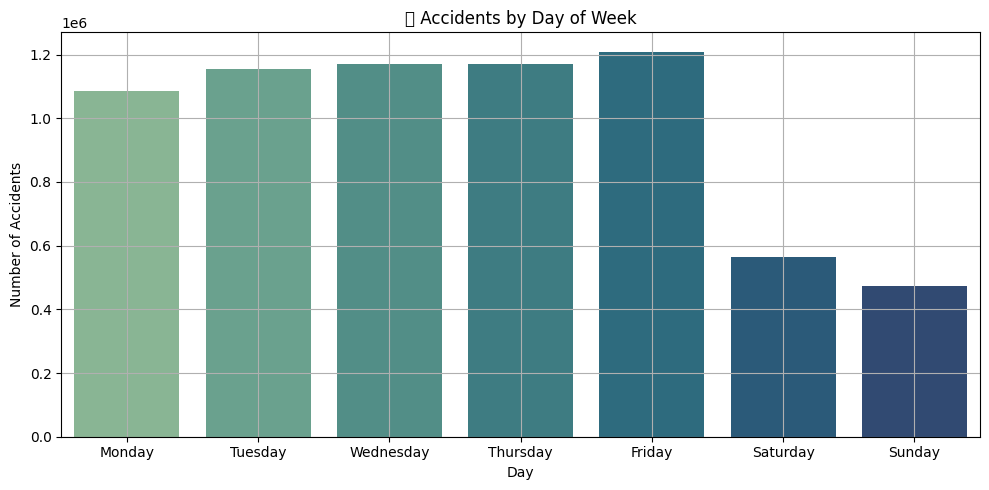

C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)],
C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:66: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vedant\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


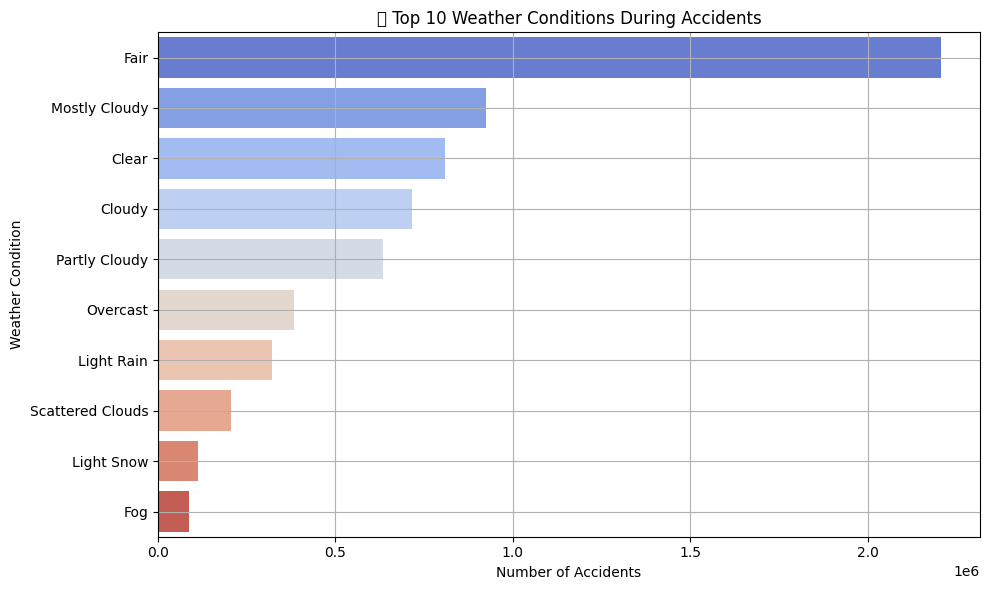

C:\Users\Vedant\AppData\Local\Temp\ipykernel_25948\963659580.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='magma')


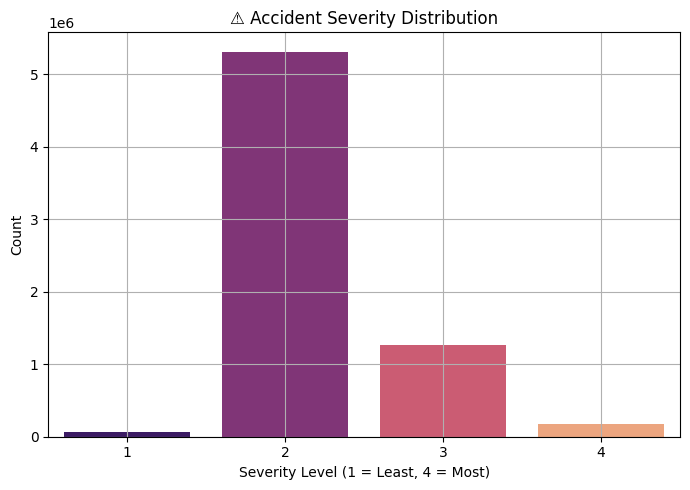

🗺️ Generating accident heatmap...
✅ Heatmap saved as 'accident_hotspots_map.html'


In [1]:
# ===================== 📌 IMPORTS =====================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# ===================== 📁 LOAD DATA =====================
# ✅ Use raw string or forward slashes to avoid path issues
file_path = r"C:\Users\Vedant\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv"

# Load a large CSV safely
df = pd.read_csv(file_path, low_memory=False)

# ===================== 🔍 QUICK PREVIEW =====================
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

# ===================== 🧹 DATA CLEANING =====================
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with missing critical values
df = df.dropna(subset=['Start_Time', 'Weather_Condition', 'Severity'])

# Create time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

# Optional: Reduce to 100K rows for performance
# df = df.sample(100000, random_state=42)

# ===================== 📊 VISUALIZATIONS =====================

# -- Accidents by Hour --
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('🕒 Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# -- Accidents by Day of Week --
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DayOfWeek', data=df, order=order, palette='crest')
plt.title('📅 Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# -- Weather Conditions --
plt.figure(figsize=(10, 6))
top_weather = df['Weather_Condition'].value_counts().head(10).index
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)],
              order=top_weather, palette='coolwarm')
plt.title('🌦️ Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.grid(True)
plt.tight_layout()
plt.show()

# -- Severity Distribution --
plt.figure(figsize=(7, 5))
sns.countplot(x='Severity', data=df, palette='magma')
plt.title('⚠️ Accident Severity Distribution')
plt.xlabel('Severity Level (1 = Least, 4 = Most)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===================== 🗺️ ACCIDENT HOTSPOT MAP =====================
# Check if latitude and longitude columns are available
if 'Start_Lat' in df.columns and 'Start_Lng' in df.columns:
    print("🗺️ Generating accident heatmap...")
    map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
    accident_map = folium.Map(location=map_center, zoom_start=5)

    # Sample for performance
    heat_data = df[['Start_Lat', 'Start_Lng']].dropna().sample(1000, random_state=42).values.tolist()

    HeatMap(heat_data).add_to(accident_map)
    accident_map.save("accident_hotspots_map.html")
    print("✅ Heatmap saved as 'accident_hotspots_map.html'")
else:
    print("⚠️ Latitude/Longitude columns not found. Skipping map.")

